# Exploración proyecto wumpus y lógica proposicional

**Notas sobre el nb8**
> *"Vamos a ignorar por el momento el hecho de que la casilla sería segura incluso habiendo hedor, porque el Wumpus podría no estar vivo."* Esto es, considerar la casilla del wumpus segura cuando el monstruo esta sin vida. 
- Agregar a la base de conocimiento este evento.

> Sobre la función `casilla_segura` del nb8:
- inlcuir `truncar` en `fluentes_mapa_mental`

> el programa a mejorar es `programaKB`

## Recreando el ambiente de tarea

In [13]:
# define rutas de trabajo e importa ambiente de trabajo
import os
import sys

CURRENT_PATH = os.getcwd()
NOTEBOOKS_PATH = os.path.join(CURRENT_PATH, os.path.pardir, 'notebooks')
PYTHON_PATH = os.path.join(CURRENT_PATH, os.path.pardir, 'python')
sys.path.append(PYTHON_PATH)

from logica import *
from entornos import *
from agentes import *
from wumpus_nb import *
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [ ]:
# inicia el ambiente

W = Wumpus(wumpus=(3,3), oro=(2,2), pozos=[(1,0), (3,1)])
W.pintar_casilla()
agente = Agente()
agente.perceptos = W.para_sentidos()
print(agente.perceptos)

In [ ]:
# moviendo el agente 

W.transicion('voltearIzquierda')
W.transicion('adelante')
W.transicion('voltearDerecha')
W.transicion('adelante')
W.transicion('adelante')
W.transicion('voltearIzquierda')
W.transicion('adelante')
W.pintar_casilla()
agente.perceptos = W.para_sentidos()
print(agente.perceptos)

## Prueba de flecha y wumpus

In [ ]:
#  dispara e impacta al wumpus

W = Wumpus(wumpus=(1,0), oro=(2,2), pozos=[(2,0), (3,1)])
W.pintar_casilla()
agente = Agente()
agente.perceptos = W.para_sentidos()
print(agente.perceptos)

W.transicion('disparar')


In [ ]:
#  dispara, impacta al wumpus y sale de la cueva

W = Wumpus(wumpus=(1,0), oro=(2,2), pozos=[(2,0), (3,1)])
agente = Agente()
agente.perceptos = W.para_sentidos()
print(agente.perceptos)

W.transicion('disparar')
W.transicion('salir')

## Cargando la base de conocimiento 
cargando la base de conocimiento según funciones trabajadas en clase, función por función

In [1]:
# define rutas de trabajo e importa ambiente de trabajo y librerias
import os
import sys

CURRENT_PATH = os.getcwd()
NOTEBOOKS_PATH = os.path.join(CURRENT_PATH, os.path.pardir, 'notebooks')
PYTHON_PATH = os.path.join(CURRENT_PATH, os.path.pardir, 'python')
sys.path.append(PYTHON_PATH)

from logica import *
from entornos import *
from agentes import *
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from busqueda import best_first_search, solucion


In [2]:
# crea el objeto `agente` para añadirle las funciones como métodos
W = Wumpus(wumpus=(3,3), oro=(1,2), pozos=[(0,3), (2,2)])
agente = Agente()

In [3]:
def brisa_pozo(self):
    
    def truncar(x):
        if x < 0:
            return 0
        elif x > 3:
            return 3
        else:
            return x

    def adyacentes(casilla):
        x, y = casilla
        adyacentes = [
            (truncar(x - 1), y), (truncar(x + 1), y),
            (x, truncar(y - 1)), (x, truncar(y + 1))
        ]
        adyacentes = [c for c in adyacentes if c != casilla]
        return adyacentes
    
    turno = agente.turno
    casillas = adyacentes(agente.loc)
    x, y = agente.loc
    formulas = []
    for c in casillas:
        x1, y1 = c
        formulas += [
            f'en({x},{y})_{turno}Y-brisa_{turno}>-pozo({x1},{y1})',                
        ]
    return formulas

setattr(Agente, 'brisa_pozo', brisa_pozo)

agente = Agente()
agente.brisa_pozo()


['en(0,0)_1Y-brisa_1>-pozo(1,0)', 'en(0,0)_1Y-brisa_1>-pozo(0,1)']

In [4]:
def hedor_wumpus(self):
    
    def truncar(x):
        if x < 0:
            return 0
        elif x > 3:
            return 3
        else:
            return x

    def adyacentes(casilla):
        x, y = casilla
        adyacentes = [
            (truncar(x - 1), y), (truncar(x + 1), y),
            (x, truncar(y - 1)), (x, truncar(y + 1))
        ]
        adyacentes = [c for c in adyacentes if c != casilla]
        return adyacentes
    
    formulas = []
    # AQUÍ COMENZA SU CÓDIGO
    turno = agente.turno
    casillas = adyacentes(agente.loc)
    x, y = agente.loc
    for c in casillas:
        x1, y1 = c
        formulas += [
            f'en({x},{y})_{turno}Y-hedor_{turno}>-wumpus({x1},{y1})',                
        ]
    # AQUÍ TERMINA SU CÓDIGO
    
    return formulas

setattr(Agente, 'hedor_wumpus', hedor_wumpus)

agente = Agente()
agente.hedor_wumpus()

['en(0,0)_1Y-hedor_1>-wumpus(1,0)', 'en(0,0)_1Y-hedor_1>-wumpus(0,1)']

In [5]:
def casilla_segura(self):
    formulas = []
    # AQUÍ COMENZA SU CÓDIGO
    casillas = [ f'({i},{j})' for i in range(0,4) for j in range(0,4)]
    for casilla in casillas: 
        formulas += [(f'-pozo{casilla}Y-wumpus{casilla}>segura{casilla}')]
    # AQUÍ TERMINA SU CÓDIGO
    return formulas

setattr(Agente, 'casilla_segura', casilla_segura)

agente = Agente()
agente.casilla_segura()

['-pozo(0,0)Y-wumpus(0,0)>segura(0,0)',
 '-pozo(0,1)Y-wumpus(0,1)>segura(0,1)',
 '-pozo(0,2)Y-wumpus(0,2)>segura(0,2)',
 '-pozo(0,3)Y-wumpus(0,3)>segura(0,3)',
 '-pozo(1,0)Y-wumpus(1,0)>segura(1,0)',
 '-pozo(1,1)Y-wumpus(1,1)>segura(1,1)',
 '-pozo(1,2)Y-wumpus(1,2)>segura(1,2)',
 '-pozo(1,3)Y-wumpus(1,3)>segura(1,3)',
 '-pozo(2,0)Y-wumpus(2,0)>segura(2,0)',
 '-pozo(2,1)Y-wumpus(2,1)>segura(2,1)',
 '-pozo(2,2)Y-wumpus(2,2)>segura(2,2)',
 '-pozo(2,3)Y-wumpus(2,3)>segura(2,3)',
 '-pozo(3,0)Y-wumpus(3,0)>segura(3,0)',
 '-pozo(3,1)Y-wumpus(3,1)>segura(3,1)',
 '-pozo(3,2)Y-wumpus(3,2)>segura(3,2)',
 '-pozo(3,3)Y-wumpus(3,3)>segura(3,3)']

In [6]:
def fluentes_mapa_mental(self):
    turno = agente.turno
    x, y = agente.loc
    formulas = [
        f'en({x},{y})_{turno}Ymirando_o_{turno}Yadelante_{turno}>en({x-1},{y})_{turno+1}',
        f'en({x},{y})_{turno}Ymirando_e_{turno}Yadelante_{turno}>en({x+1},{y})_{turno+1}',
        f'en({x},{y})_{turno}Ymirando_s_{turno}Yadelante_{turno}>en({x},{y-1})_{turno+1}',
        f'en({x},{y})_{turno}Ymirando_n_{turno}Yadelante_{turno}>en({x},{y+1})_{turno+1}',
        f'en({x},{y})_{turno}YvoltearIzquierda_{turno}>en({x},{y})_{turno+1}',
        f'en({x},{y})_{turno}YvoltearDerecha_{turno}>en({x},{y})_{turno+1}',
        f'en({x},{y})_{turno}Yagarrar_{turno}>en({x},{y})_{turno+1}',
        f'mirando_o_{turno}Yadelante_{turno}>mirando_o_{turno+1}',
        f'mirando_s_{turno}Yadelante_{turno}>mirando_s_{turno+1}',
        f'mirando_e_{turno}Yadelante_{turno}>mirando_e_{turno+1}',
        f'mirando_n_{turno}Yadelante_{turno}>mirando_n_{turno+1}',
        f'mirando_o_{turno}Yagarrar_{turno}>mirando_o_{turno+1}',
        f'mirando_s_{turno}Yagarrar_{turno}>mirando_s_{turno+1}',
        f'mirando_e_{turno}Yagarrar_{turno}>mirando_e_{turno+1}',
        f'mirando_n_{turno}Yagarrar_{turno}>mirando_n_{turno+1}',
        f'mirando_o_{turno}YvoltearIzquierda_{turno}>mirando_s_{turno+1}',
        f'mirando_s_{turno}YvoltearIzquierda_{turno}>mirando_e_{turno+1}',
        f'mirando_e_{turno}YvoltearIzquierda_{turno}>mirando_n_{turno+1}',
        f'mirando_n_{turno}YvoltearIzquierda_{turno}>mirando_o_{turno+1}',
        f'mirando_o_{turno}YvoltearDerecha_{turno}>mirando_n_{turno+1}',
        f'mirando_n_{turno}YvoltearDerecha_{turno}>mirando_e_{turno+1}',
        f'mirando_e_{turno}YvoltearDerecha_{turno}>mirando_s_{turno+1}',
        f'mirando_s_{turno}YvoltearDerecha_{turno}>mirando_o_{turno+1}',
    ]
    casillas = [(x,y) for x in range(12) for y in range(12)]
    for c in casillas:
        x, y = c
        formulas += [
            f'en({x},{y})_{turno}>visitada({x},{y})_{turno}',                
            f'visitada({x},{y})_{turno}>visitada({x},{y})_{turno+1}',                
        ]
    return formulas

setattr(Agente, 'fluentes_mapa_mental', fluentes_mapa_mental)

agente = Agente()
agente.fluentes_mapa_mental()

['en(0,0)_1Ymirando_o_1Yadelante_1>en(-1,0)_2',
 'en(0,0)_1Ymirando_e_1Yadelante_1>en(1,0)_2',
 'en(0,0)_1Ymirando_s_1Yadelante_1>en(0,-1)_2',
 'en(0,0)_1Ymirando_n_1Yadelante_1>en(0,1)_2',
 'en(0,0)_1YvoltearIzquierda_1>en(0,0)_2',
 'en(0,0)_1YvoltearDerecha_1>en(0,0)_2',
 'en(0,0)_1Yagarrar_1>en(0,0)_2',
 'mirando_o_1Yadelante_1>mirando_o_2',
 'mirando_s_1Yadelante_1>mirando_s_2',
 'mirando_e_1Yadelante_1>mirando_e_2',
 'mirando_n_1Yadelante_1>mirando_n_2',
 'mirando_o_1Yagarrar_1>mirando_o_2',
 'mirando_s_1Yagarrar_1>mirando_s_2',
 'mirando_e_1Yagarrar_1>mirando_e_2',
 'mirando_n_1Yagarrar_1>mirando_n_2',
 'mirando_o_1YvoltearIzquierda_1>mirando_s_2',
 'mirando_s_1YvoltearIzquierda_1>mirando_e_2',
 'mirando_e_1YvoltearIzquierda_1>mirando_n_2',
 'mirando_n_1YvoltearIzquierda_1>mirando_o_2',
 'mirando_o_1YvoltearDerecha_1>mirando_n_2',
 'mirando_n_1YvoltearDerecha_1>mirando_e_2',
 'mirando_e_1YvoltearDerecha_1>mirando_s_2',
 'mirando_s_1YvoltearDerecha_1>mirando_o_2',
 'en(0,0)_1>visi

In [7]:
def adyacentes_seguras(self):
    
    def truncar(x):
        if x < 0:
            return 0
        elif x > 3:
            return 3
        else:
            return x

    def adyacentes(casilla):
        x, y = casilla
        adyacentes = [
            (truncar(x - 1), y), (truncar(x + 1), y),
            (x, truncar(y - 1)), (x, truncar(y + 1))
        ]
        adyacentes = [c for c in adyacentes if c != casilla]
        return adyacentes   
   
    casillas_seguras = []
    # AQUÍ COMIENZA SU CÓDIGO
    casillas = adyacentes(agente.loc)
    for c in casillas: 
        d = str(c).replace(" ", "")
        objetivo = f'segura{d}'
        #print("-->", "Objetivo:", objetivo)
        #print()
        #print("Datos:", agente.base.datos)
        #print()
        #print("Reglas aplicables para el objetivo:")
        #reglas_objeto = agente.base.reglas_aplicables(objetivo)
        #for r in reglas_objeto:
        #    print(' Y '.join(r.cuerpo), ">", r.cabeza, "\n")
        res = ASK(objetivo, 'success', agente.base)
        if res: 
            casillas_seguras.append(c)
        #else: 
        #    print('¡no seguro! \n')
    # AQUÍ TERMINA SU CÓDIGO
    return casillas_seguras

setattr(Agente,"adyacentes_seguras",adyacentes_seguras)

In [8]:
def estimar_estado(self, W):
    self.base.TELL(f'segura({self.loc[0]},{self.loc[1]})')
    cas_seguras = self.adyacentes_seguras()
    self.base.TELL('Y'.join([f'segura({c[0]},{c[1]})' for c in cas_seguras]))
    nueva_dir = self.nueva_direccion()
    self.base.TELL(nueva_dir)
    nueva_pos = self.nueva_posicion()
    self.base.TELL(nueva_pos)
    formulas = [d for d in self.base.datos if f'_{self.turno}' in d]
    formulas += [s for s in self.base.datos if 'segura' in s]
    formulas += agente.fluentes_mapa_mental()
    formulas += agente.brisa_pozo()
    formulas += agente.hedor_wumpus()
    formulas += agente.casilla_segura()
    formulas += self.casillas_visitadas()
    agente.perceptos = W.para_sentidos()
    formulas += [agente.interp_percepto(mundo='wumpus')]
    self.base = LPQuery(formulas)
  
setattr(Agente,'estimar_estado',estimar_estado)

def casillas_visitadas(self):
    turno = self.turno
    # Guardamos las casillas visitadas
    visitadas = []
    casillas = [(x,y) for x in range(4) for y in range(4)]
    for c in casillas:
        x, y = c
        consulta = ASK(f'visitada({x},{y})_{turno}', 'success', self.base)
        if consulta:
            visitadas.append(f'visitada({x},{y})_{turno}')
    return visitadas

setattr(Agente,'casillas_visitadas',casillas_visitadas)

def nueva_posicion(self):
    
    def truncar(x):
        if x < 0:
            return 0
        elif x > 3:
            return 3
        else:
            return x

    def adyacentes(casilla):
        x, y = casilla
        adyacentes = [
            (truncar(x - 1), y), (truncar(x + 1), y),
            (x, truncar(y - 1)), (x, truncar(y + 1))
        ]
        adyacentes = [c for c in adyacentes if c != casilla]
        return adyacentes 
    
    casillas = [self.loc] + adyacentes(self.loc)
    for c in casillas:
        x, y = c
        pos = f'en({x},{y})_{self.turno}'
        evaluacion = ASK(pos, 'success', self.base)
        if evaluacion:
            self.loc = (x,y)
            return pos
    raise Exception('¡No se encontró posición!')

setattr(Agente,'nueva_posicion',nueva_posicion)

def nueva_direccion(self):
    direcciones = ['o', 'e', 's', 'n']
    for d in direcciones:
        direccion = f'mirando_{d}_{self.turno}'
        evaluacion = ASK(direccion, 'success', self.base)
        if evaluacion:
            return direccion
    raise Exception('¡No se encontró dirección!')
            
setattr(Agente,'nueva_direccion',nueva_direccion)

def solo_direccion(self):
    direcciones = ['o', 'e', 's', 'n']
    dir_direcciones = {'o':'oeste', 'e':'este', 's':'sur', 'n':'norte'}
    for d in direcciones:
        direccion = f'mirando_{d}_{self.turno}'
        if direccion in self.base.datos:
            return dir_direcciones[d]
    raise Exception('¡No se encontró dirección!')
            
setattr(Agente,'solo_direccion',solo_direccion)

In [9]:
def cache(self):
    turno = self.turno
    casilla_actual = self.loc
    direccion = self.solo_direccion()
    cas_seguras = self.adyacentes_seguras()
    cas_seguras = [c for c in cas_seguras if c != casilla_actual]
    cas_visitadas = self.casillas_visitadas()
    cas_visitadas = [tuple([int(s[9]),int(s[11])]) for s in cas_visitadas]
    return turno, casilla_actual, direccion, cas_seguras, cas_visitadas

setattr(Agente, 'cache', cache)


In [10]:
def todas_seguras(self):
    casillas_seguras = []
    for x in range(4):
        for y in range(4):
            objetivo = f'segura({x},{y})'  
            resultado = ASK(objetivo, 'success', self.base)
            if resultado:
                casillas_seguras.append((x,y))
    return casillas_seguras

setattr(Agente,"todas_seguras",todas_seguras)

In [11]:
def programaKB(self, DEB=False):
    acciones = []
    turno, casilla_actual, direccion, cas_seguras, cas_visitadas = self.cache()
    if DEB:
        print('Turno acutal:', turno)
        print('Casilla actual:', casilla_actual)
        print('Dirección actual:', direccion)
        print('Casillas adyacentes seguras:', cas_seguras)
        print('Casillas visitadas:', cas_visitadas)
    if ASK(f'brillo_{turno}','success',self.base):
        if DEB:
            print('¡Oh, el oro!')
        acciones.append('agarrar')
        R = Rejilla(casilla_actual, (0,0), self.todas_seguras())
        camino = best_first_search(R)
        camino = [casilla_actual] + solucion(camino)
        acciones += acciones_camino(camino, direccion)
        acciones.append('salir')
    else:
        opciones = [casilla for casilla in cas_seguras if casilla not in cas_visitadas]
        if DEB:
            print('Casillas opcionales:', opciones)
        if len(opciones) > 0:
            casilla_ir = choice(opciones)
            if DEB:
                print('El agente quiere ir a la casilla', casilla_ir)
            camino = [casilla_actual, casilla_ir]
            acciones = acciones_camino(camino, direccion)
        elif len(cas_seguras) > 0:
            casilla_ir = choice(cas_seguras)
            if DEB:
                print('El agente quiere devolverse a la casilla', casilla_ir)
            camino = [casilla_actual, casilla_ir]
            acciones = acciones_camino(camino, direccion)
        else:
            print("¡Caso no contemplado!")
    self.acciones += acciones

setattr(Agente, 'programa', programaKB)

In [12]:
class Rejilla:
	'''
	Problema del tránsito por la rejilla
	desde donde está el héroe hasta una
	casilla objetivo
	Parámetros:
		- inicial, una casilla de la forma (x,y)
		- objetivo, una casilla de la forma (x,y)
		- seguras, una lista de casillas que restringen
					las acciones aplicables
	'''
	
	def __init__(self, inicial, objetivo, seguras):
		self.estado_inicial = inicial
		self.estado_objetivo = objetivo
		self.casillas_seguras = seguras
	
	def adyacentes(self, casilla):
		def truncar(x):
			if x < 0:
				return 0
			elif x > 3:
				return 3
			else:
				return x
		x, y = casilla
		adyacentes = [
			(truncar(x - 1), y), (truncar(x + 1), y),
			(x, truncar(y - 1)), (x, truncar(y + 1))
		]
		adyacentes = [c for c in adyacentes if c != casilla]
		return adyacentes
	
	def acciones_aplicables(self, estado):
		return [casilla for casilla in self.adyacentes(estado) if casilla in self.casillas_seguras]
	
	def transicion(self, estado, accion):
		return accion
	
	def test_objetivo(self, estado):
		return estado == self.estado_objetivo
	
	def costo(self, estado, accion):
		x1, y1 = estado
		x2, y2 = self.transicion(estado, accion)
		return abs(x1 - x2) + abs(y1 - y2)
	
	def codigo(self, estado):
		x, y = estado
		return f"{x}-{y}"


In [13]:
W = Wumpus(wumpus=(3,3), oro=(1,2), pozos=[(0,3), (2,2)])
agente = Agente()
formulas = agente.fluentes_mapa_mental()
formulas += agente.brisa_pozo()
formulas += agente.hedor_wumpus()
formulas += agente.casilla_segura()
formulas += [f'en(0,0)_1', 'mirando_e_1', 'segura(0,0)']
agente.base = LPQuery(formulas)
agente.perceptos = W.para_sentidos()
c = agente.interp_percepto(mundo='wumpus')
agente.base.TELL(c)



Juego terminado!
 Puntaje: 978


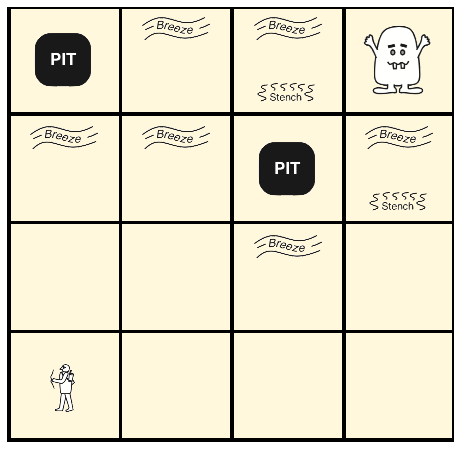

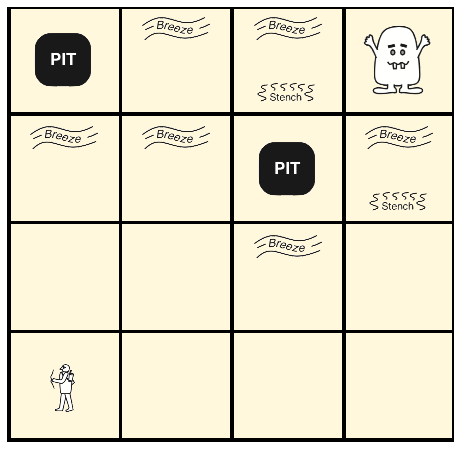

In [14]:
for i in range(30):
    a = agente.reaccionar()
    formula_accion = f'{a}_{agente.turno-1}'
    agente.base.TELL(formula_accion)
    W.transicion(a)
    if not W.juego_activo:
        clear_output(wait=True)
        W.pintar_todo()
        print(W.mensaje)
        break
    agente.estimar_estado(W)
    clear_output(wait=True)
    W.pintar_todo()
    plt.show()
    sleep(.25) 
    

## Cargando la clase agente modificada
creando el objeto agente con todos los métodos de la base de conocimiento desde una libreria

In [1]:
# define rutas de trabajo e importa ambiente de trabajo
import os
import sys

CURRENT_PATH = os.getcwd()
NOTEBOOKS_PATH = os.path.join(CURRENT_PATH, os.path.pardir, 'notebooks')
PYTHON_PATH = os.path.join(CURRENT_PATH, os.path.pardir, 'python')
sys.path.append(PYTHON_PATH)

from logica import *
from entornos import *
from wkb import *
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from busqueda import best_first_search, solucion

In [7]:
W = Wumpus(wumpus=(3,3), oro=(1,2), pozos=[(0,3), (2,2)])
agente = Agente_wkb()
formulas = agente.fluentes_mapa_mental_wkb()
formulas += agente.brisa_pozo_wkb()
formulas += agente.hedor_wumpus_wkb()
formulas += agente.casilla_segura_wkb()
formulas += [f'en(0,0)_1', 'mirando_e_1', 'segura(0,0)']
agente.base = LPQuery(formulas)
agente.perceptos = W.para_sentidos()
c = agente.interp_percepto_wkb(mundo='wumpus')
agente.base.TELL(c)


In [8]:
def programaKB(self, DEB=False):
    acciones = []
    turno, casilla_actual, direccion, cas_seguras, cas_visitadas = self.cache_wkb()
    if DEB:
        print('Turno acutal:', turno)
        print('Casilla actual:', casilla_actual)
        print('Dirección actual:', direccion)
        print('Casillas adyacentes seguras:', cas_seguras)
        print('Casillas visitadas:', cas_visitadas)
    if ASK(f'brillo_{turno}','success',self.base):
        if DEB:
            print('¡Oh, el oro!')
        acciones.append('agarrar')
        R = Rejilla(casilla_actual, (0,0), self.todas_seguras_wkb())
        camino = best_first_search(R)
        camino = [casilla_actual] + solucion(camino)
        acciones += acciones_camino(camino, direccion)
        acciones.append('salir')
    else:
        opciones = [casilla for casilla in cas_seguras if casilla not in cas_visitadas]
        if DEB:
            print('Casillas opcionales:', opciones)
        if len(opciones) > 0:
            casilla_ir = choice(opciones)
            if DEB:
                print('El agente quiere ir a la casilla', casilla_ir)
            camino = [casilla_actual, casilla_ir]
            acciones = acciones_camino(camino, direccion)
        elif len(cas_seguras) > 0:
            casilla_ir = choice(cas_seguras)
            if DEB:
                print('El agente quiere devolverse a la casilla', casilla_ir)
            camino = [casilla_actual, casilla_ir]
            acciones = acciones_camino(camino, direccion)
        else:
            print("¡Caso no contemplado!")
    self.acciones += acciones

setattr(Agente_wkb, 'programa', programaKB)

Juego terminado!
 Puntaje: 986


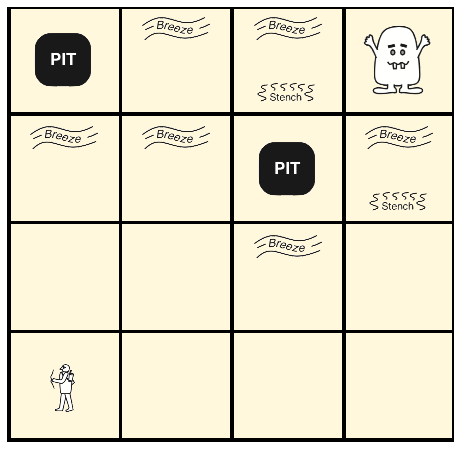

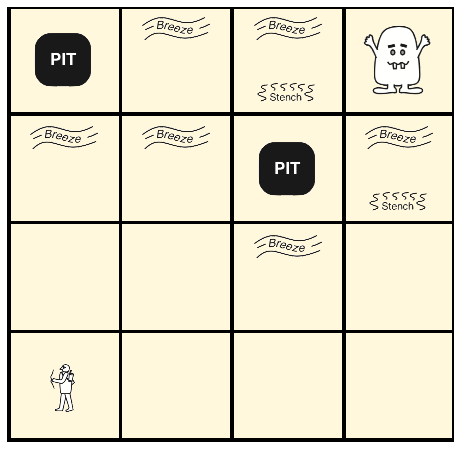

In [9]:
for i in range(30):
    a = agente.reaccionar_wkb()
    formula_accion = f'{a}_{agente.turno-1}'
    agente.base.TELL(formula_accion)
    W.transicion(a)
    if not W.juego_activo:
        clear_output(wait=True)
        W.pintar_todo()
        print(W.mensaje)
        break
    agente.estimar_estado_wkb(W)
    clear_output(wait=True)
    W.pintar_todo()
    plt.show()
    sleep(.25) 